### Importar datos y paquetes

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [119]:
data = pd.read_excel('data1.xlsx').to_numpy()

data[:,1] = data[:,1]/max(data[:,1])

### Lo divertido

Haciendo un ajuste cualquiera, omitiendo los primeros 5 datos

In [120]:
def fitfunc(f, Vo, q): # Función a ajustar
    f0 = 5500
    return Vo / ((1 + (q**2)*((f/f0 - f0/f)**2))**(1/2))
     
param = curve_fit(fitfunc, data[5:,0], data[5:,1])[0]   # Cálculo de parámetros del ajuste

print(f"Los coeficientes Vo, q son {param}.")

numx = np.linspace(0.1,20000,10000)

Los coeficientes Vo, q son [0.96687772 1.18757923].


Graficando el ajuste

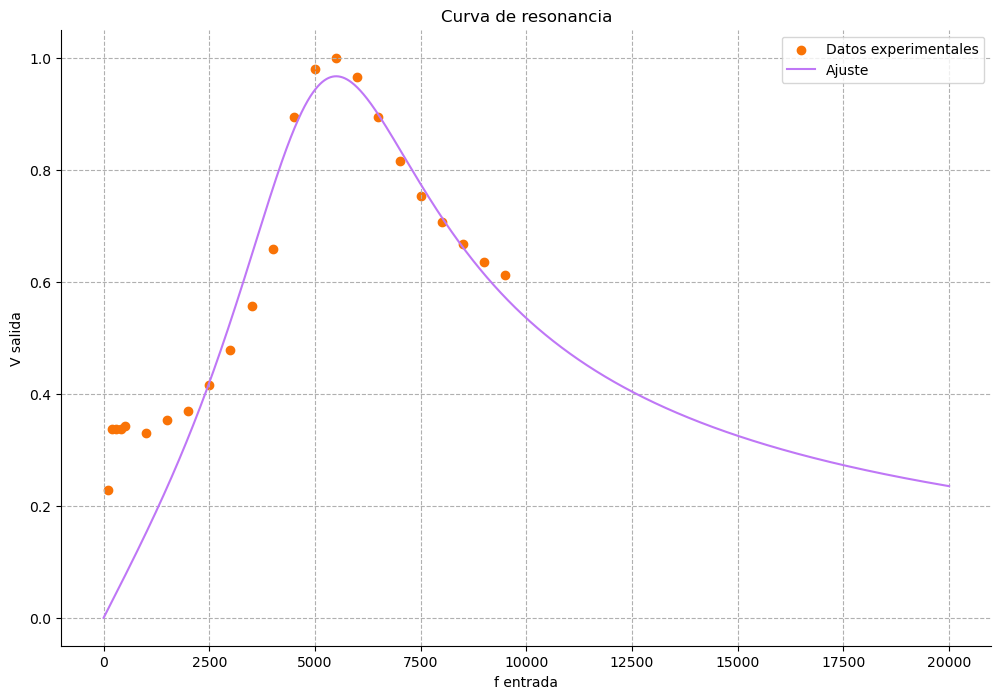

In [121]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], color="xkcd:orange", marker='o', label="Datos experimentales")
plt.plot(numx, fitfunc(numx, *param), color="xkcd:light purple", label="Ajuste")

plt.ylabel("V salida")
plt.xlabel("f entrada")
plt.title("Curva de resonancia")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend()
plt.show()

Acá ChatGPT sacó dos métodos distintos para sacar las dos frecuencias de corte: uno para cada uno. Ya sé que quedó una porquería y eso tiene solución fácil pero tenía mucha pereza de hacerlo yo

In [144]:
def find_f2(Vout, f_range, precision, Vo, q):
    a, b = f_range # Desempaquetamos el rango en los extremos a y b
    while (b - a) > precision:
        mid = (a + b) / 2 # Encontramos el punto medio del intervalo
        if fitfunc(mid, Vo, q) < Vout:
            a = mid # Si el valor en el punto medio es menor que Vout, movemos a la izquierda
        else:
            b = mid # Si el valor en el punto medio es mayor que Vout, movemos a la derecha
    return (a + b) / 2 # Una vez que hemos encontrado un intervalo lo suficientemente pequeño, devolvemos su punto medio como la raíz encontrada

p1 = find_f2(0.7,(0,5500),0.1,*param)
def find_f(Vout, Vo, q):
    f0 = 5500
    def eqn(f):
        return fitfunc(f, Vo, q) - Vout
    f1 = fsolve(eqn, f0)[0]
    return f1

p2 = find_f(0.7,*param)

bw = p2-p1

print(f"Las frecuencias de corte son {p1:.3f} y {p2:.3f}, entonces el ancho de banda es {bw:.3f}")

Las frecuencias de corte son 3719.692 y 8132.432, entonces el ancho de banda es 4412.740


Graficando con ancho de banda

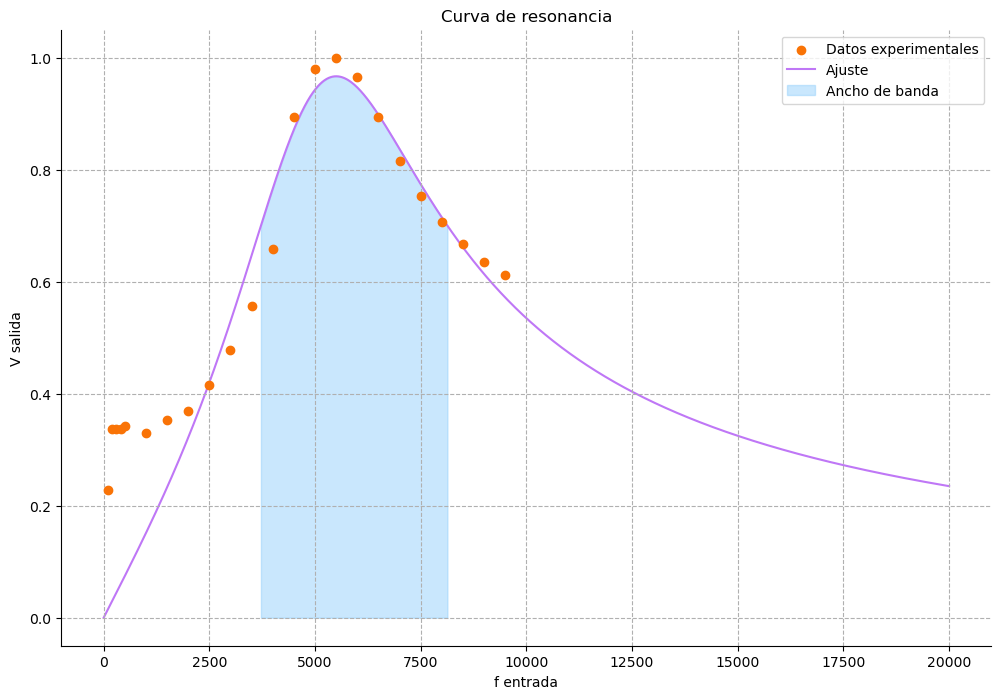

In [140]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], color="xkcd:orange", marker='o', label="Datos experimentales", zorder=2)
plt.plot(numx, fitfunc(numx, *param), color="xkcd:light purple", label="Ajuste", zorder=1)
plt.fill_between(numx, fitfunc(numx, *param), 0,
                 where = (numx > p1) & (numx <= p2),
                 color = "xkcd:light blue", alpha=0.5, zorder=0,
                 label="Ancho de banda")
plt.ylabel("V salida")
plt.xlabel("f entrada")
plt.title("Curva de resonancia")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle="--")
plt.legend()
plt.show()

Factor de calidad:

In [147]:
print(f"El factor de calidad es {bw/5500:.3f}")

El factor de calidad es 0.802


Resistencia total del circuito: